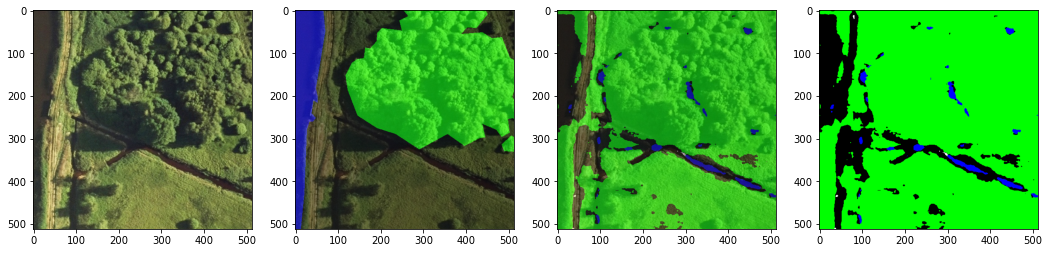

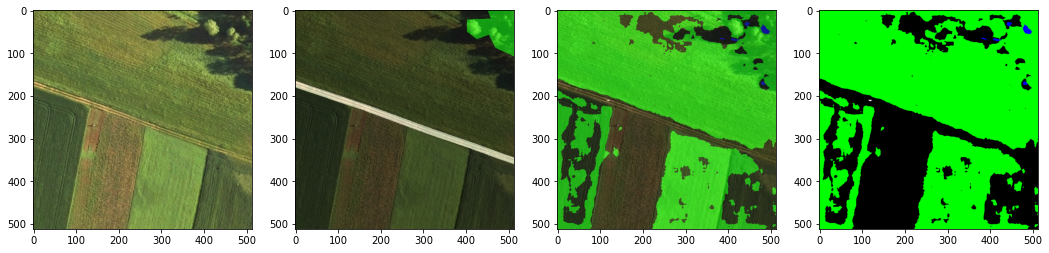

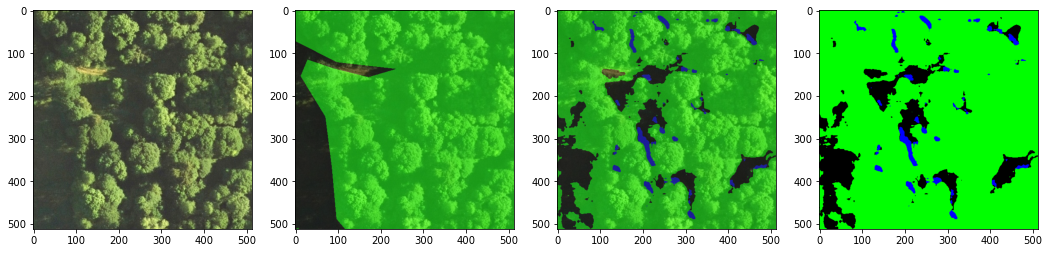

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from src.features.evaluation_utils import ConfusionMatrix, PredictionIoU
from src.models.train_model import Model
from src.features.dataset import Dataset
from src.visualization.visualize import PredictionMasks


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


DATA_DIR = "/home/marcin/git_workspace/Thesis_project/Semantic-segmentation-of-LandCover.ai-dataset/data/processed/"
BATCH_SIZE = 2
IMG_HEIGHT = 512
IMG_WIDTH = 512
NUM_CLASSES = 5


model_creator = Model(IMG_HEIGHT, IMG_WIDTH, NUM_CLASSES)
model = model_creator.get_deeplab_model(
    weights="cityscapes",
    freeze_layers=True,
    custom_freeze_border=359,
    activation="softmax",
)

model.load_weights("/home/marcin/git_workspace/Thesis_project/Semantic-segmentation-of-LandCover.ai-dataset/notebooks/exploratory/results/DeepLabv3+/9.1_modified_deeplab/best_dice_loss/checkpoint")
landcover_dataset = Dataset(DATA_DIR, IMG_HEIGHT, IMG_WIDTH, NUM_CLASSES, BATCH_SIZE)
train_dataset, val_dataset, test_dataset = landcover_dataset.generate_datasets()
#
# df = ConfusionMatrix(model, test_dataset, NUM_CLASSES).get_dataframe()
# print(df)

# df = PredictionIoU(model, test_dataset, NUM_CLASSES).get_iou_for_every_class()
# print(df)

PredictionMasks(model, landcover_dataset, NUM_CLASSES).display_overlay_predictions_for_test_set(3)